0.8333333333333334
0.7837837837837838
0.5976331360946746
0.25
1.0
0.41304347826086957
0.4188034188034188
0.0
0.4406779661016949
0.2125
0.21851851851851853
0.0
6 (1.0, 'child') 0.8333333333333334
37 (1.0, 'young adult') 0.7837837837837838
169 (1.0, 'adult') 0.5976331360946746
4 (1.0, 'senior') 0.25
19 (2.0, 'child') 1.0
46 (2.0, 'young adult') 0.41304347826086957
117 (2.0, 'adult') 0.4188034188034188
2 (2.0, 'senior') 0.0
59 (3.0, 'child') 0.4406779661016949
160 (3.0, 'young adult') 0.2125
270 (3.0, 'adult') 0.21851851851851853
2 (3.0, 'senior') 0.0


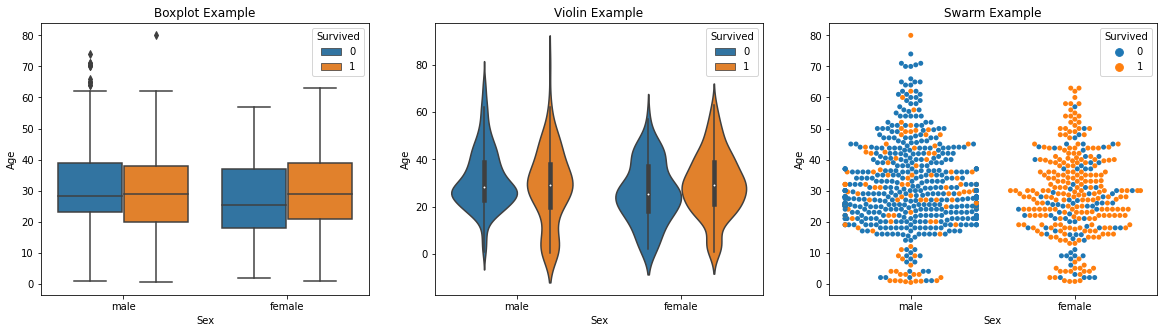

In [1]:
import copy
import warnings
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
warnings.simplefilter('ignore', DeprecationWarning)
from sklearn.impute import KNNImputer

%matplotlib inline

# Read csv into dataframe
df = pd.read_csv('https://raw.githubusercontent.com/eclarson/DataMiningNotebooks/master/data/titanic.csv')

# Clean df by deleting columns that are not useful
for col in ['PassengerId','Name','Cabin','Ticket']:
    if col in df:
        del df[col]

# create obj using K-Nearest Neighbor Imputer
knn_obj = KNNImputer(n_neighbors=5)

# convert df into numpy array
temp = df[['Pclass','Age','SibSp','Parch','Fare']].to_numpy()

# fit and transform given numpy df
temp_imputed = knn_obj.fit_transform(temp)

# Create Deep Copy using old df
df_imputed = copy.deepcopy(df)

# substitute values from imputed obj
df_imputed[['Pclass','Age','SibSp','Parch','Fare']] = temp_imputed
df_imputed['age_range'] = pd.cut(df_imputed['Age'],[0,15,25,65,1e6], labels=['child','young adult','adult','senior'])
df_grouped = df_imputed.groupby(by=['Pclass', 'age_range'])
survival_rate = df_grouped.Survived.sum() / df_grouped.Survived.count()


# Different methods to print out values in survival series
for x, y in enumerate(survival_rate):
    print(y)

df_grouped = df_imputed.groupby(by=['Pclass','age_range'])
for val,grp in df_grouped['Survived']:
    print(len(grp), val, sum(grp) / len(grp) )

# =================================================================

plt.subplots(figsize=(20, 5))

# sns box plot
plt.subplot(1,3,1)
sns.boxplot(x="Sex", y="Age", hue="Survived", data=df_imputed)
plt.title('Boxplot Example')

# sns violin plot
plt.subplot(1,3,2)
sns.violinplot(x="Sex", y="Age", hue="Survived", data=df_imputed)
plt.title('Violin Example')

# sns swarm plot
plt.subplot(1,3,3)
sns.swarmplot(x="Sex", y="Age", hue="Survived", data=df_imputed)
plt.title('Swarm Example')

plt.show()

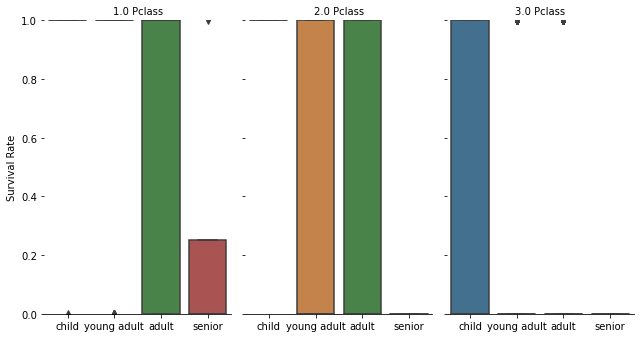

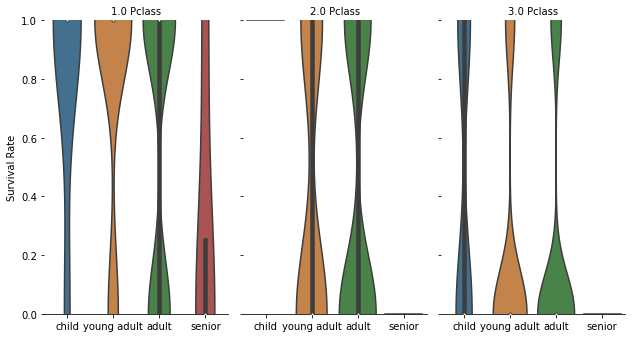

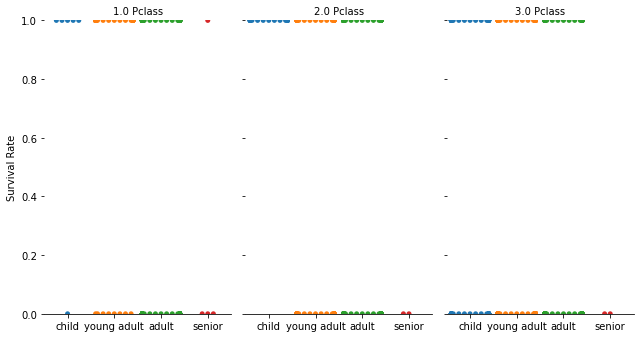

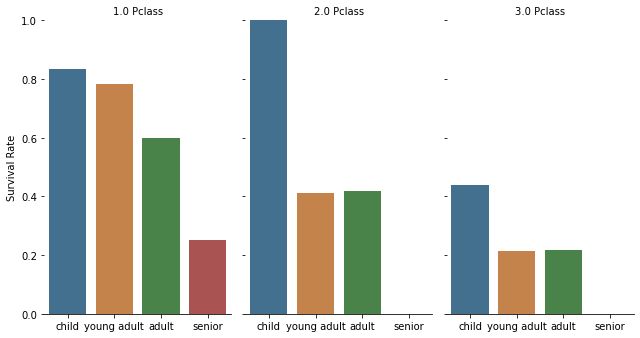

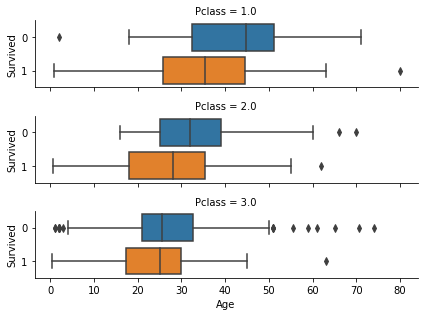

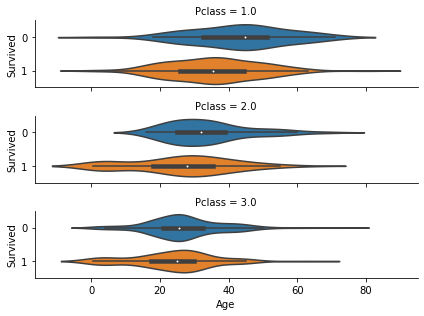

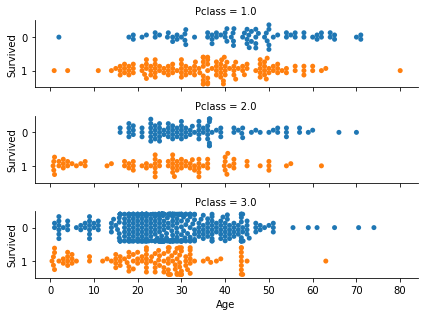

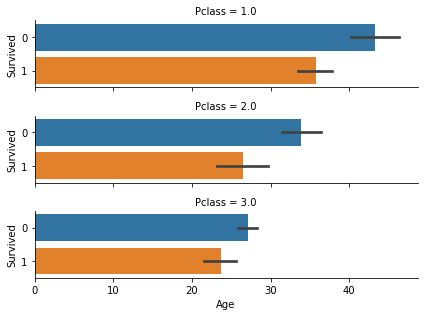

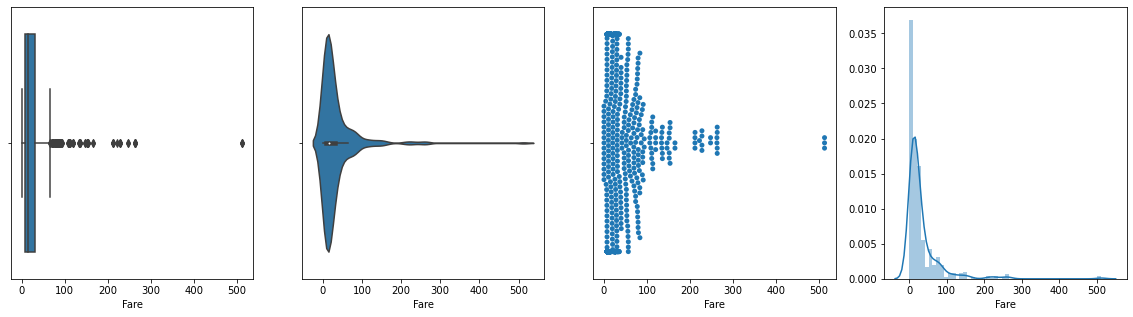

In [2]:
# Method 1 ==============================================
g = sns.catplot(x="age_range", y="Survived", col="Pclass",
                data=df_imputed, saturation=.5,
                kind="box", ci=None, aspect=.6)

(g.set_axis_labels("", "Survival Rate")
  .set_titles("{col_name} {col_var}")
  .set(ylim=(0, 1))
  .despine(left=True))

h = sns.catplot(x="age_range", y="Survived", col="Pclass",
                data=df_imputed, saturation=.5,
                kind="violin", ci=None, aspect=.6)

(h.set_axis_labels("", "Survival Rate")
  .set_titles("{col_name} {col_var}")
  .set(ylim=(0, 1))
  .despine(left=True))

j = sns.catplot(x="age_range", y="Survived", col="Pclass",
                data=df_imputed,
                kind="swarm", ci=None, aspect=.6)

(j.set_axis_labels("", "Survival Rate")
  .set_titles("{col_name} {col_var}")
  .set(ylim=(0, 1))
  .despine(left=True))

k = sns.catplot(x="age_range", y="Survived", col="Pclass",
                data=df_imputed, saturation=.5,
                kind="bar", ci=None, aspect=.6)

(k.set_axis_labels("", "Survival Rate")
  .set_titles("{col_name} {col_var}")
  .set(ylim=(0, 1))
  .despine(left=True))

# Method 2 ===============================================
sns.catplot(x='Age', y='Survived', row='Pclass',
            kind="box", orient="h", height=1.5, aspect=4,
            data=df_imputed.query("Age > 0"))

sns.catplot(x='Age', y='Survived', row='Pclass',
            kind="violin", orient="h", height=1.5, aspect=4,
            data=df_imputed.query("Age > 0"))

sns.catplot(x='Age', y='Survived', row='Pclass',
            kind="swarm", orient="h", height=1.5, aspect=4,
            data=df_imputed.query("Age > 0"))

sns.catplot(x='Age', y='Survived', row='Pclass',
            kind="bar", orient="h", height=1.5, aspect=4,
            data=df_imputed.query("Age > 0"))

# Method 3 ================================================
plt.subplots(figsize=(20,5))
for i, plot_func in enumerate([sns.boxplot, sns.violinplot, sns.swarmplot, sns.distplot]):
    plt.subplot(1,4,i+1)
    plot_func(df_imputed.Fare)
plt.show()
